# Chatbot(챗봇)

## 1 데이터 분석 
### 1.1 데이터 불러오기 

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('./data/ChatbotData .csv', encoding='utf-8')
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


### 1.2 문장 전체에 대한 분석 

In [8]:
sentences = list(data['Q']) + list(data['A'])

In [9]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

In [13]:
from konlpy.tag import Okt

In [14]:
okt = Okt()
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [15]:
import matplotlib.pyplot as plt

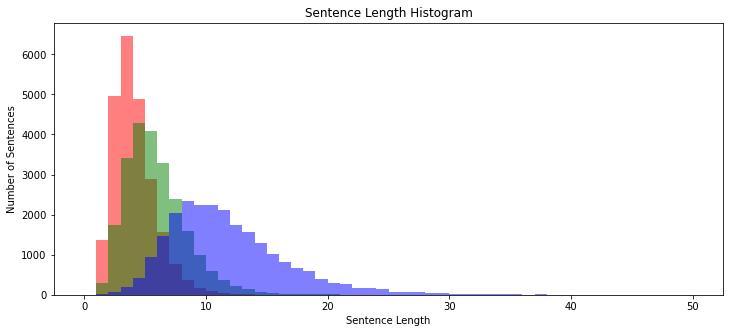

In [18]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='eumjeol')
plt.title("Sentence Length Histogram")
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()